714
[[0.89827402 0.10172598]] [1. 0.]
[[0.0108258 0.9891742]] [0. 1.]
[[0.53156915 0.46843085]] [0. 1.]
[[0.00832462 0.99167538]] [0. 1.]
[[0.91002175 0.08997825]] [1. 0.]
[[0.85263655 0.14736345]] [1. 0.]
[[0.40658236 0.59341764]] [1. 0.]
[[0.57113429 0.42886571]] [0. 1.]
[[0.12675271 0.87324729]] [0. 1.]
[[0.40316295 0.59683705]] [0. 1.]
[[0.00806327 0.99193673]] [0. 1.]
[[0.89659626 0.10340374]] [1. 0.]
[[0.9246123 0.0753877]] [1. 0.]
[[0.46949152 0.53050848]] [1. 0.]
[[0.21272799 0.78727201]] [0. 1.]
[[0.51724111 0.48275889]] [1. 0.]
[[0.66878074 0.33121926]] [1. 0.]
[[0.91580331 0.08419669]] [1. 0.]
[[0.91027537 0.08972463]] [0. 1.]
[[0.47648985 0.52351015]] [0. 1.]
[[0.56222254 0.43777746]] [0. 1.]
[[0.58180653 0.41819347]] [1. 0.]
[[0.76879624 0.23120376]] [0. 1.]
[[0.6913925 0.3086075]] [1. 0.]
[[0.74061779 0.25938221]] [1. 0.]
[[0.92808132 0.07191868]] [1. 0.]
[[0.63924207 0.36075793]] [1. 0.]
[[0.74792887 0.25207113]] [1. 0.]
[[0.89783687 0.10216313]] [1. 0.]
[[0.59893872 0.4

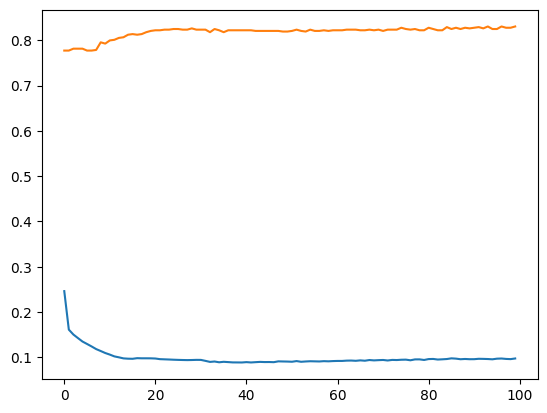

In [10]:
import numpy as np
from ClassModules import *

from pandas import DataFrame

data = np.genfromtxt("train.csv", delimiter=",")
dataset = []

raw_pyhton_dataset = []


for row in data[1:]:
    raw_pyhton_dataset.append([row[2]/3, row[4], row[5] / 50, row[9] / 100, int(row[1])])


raw_dataset = DataFrame(raw_pyhton_dataset)
res = raw_dataset.dropna(axis=0)
res = res.to_numpy()

for i in range(714):
    row = res[i]
    data = [0., 0.]
    data[int(row[4])] = 1.0
    # data = 0.0
    # if int(row[4]):
    #     data = 1.0
    out = np.array(data)
    dataset_row = [np.array([[row[0], row[1], row[2], row[3]]]),  np.array(out)]
    
    dataset.append( dataset_row )
    # print([np.array([row[0], row[1], row[2], row[3]]), np.array([row[3]]) ] )
# print(raw_dataset)

# for i in res[:10]:
#     print(res[i])
    
print(len(dataset))

model = Model([[4], [20, relu], [10, relu], [2, softmax]], 'Adam', type_='crossentropy', ALPHA=0.001)
loss_arr, accuracy_arr = model.train(dataset, need_calculate_loss=True, need_calculate_accuracy=True, num_epochs=100)

for i in range(30):
    print(model.predict(dataset[i][0]), dataset[i][1])

print(model.calc_accuracy(dataset))


import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.plot(accuracy_arr)    
plt.show()

In [11]:
model.layers

In [12]:
input_layer = model.layers[0]
print('neurons:', input_layer.get_outs_number(), 
      # '\ninput:',  input_layer.get_results()[0], 
      '\nclass:', input_layer.__class__.__name__)

neurons: 4 
class: InputLayer


In [49]:
denses_for_save = [
    {'name': 'dense',
     'weights': [
         {'name': 'bias:0',
         'numpy': []},
         {'name': 'kernel:0',
         'numpy': []}
     ]},
    {'name': 'dense_1',
     'weights': [
         {'name': 'bias:0',
         'numpy': []},
         {'name': 'kernel:0',
         'numpy': []}
     ]},
    {'name': 'dense_2',
     'weights': [
         {'name': 'bias:0',
         'numpy': []},
         {'name': 'kernel:0',
         'numpy': []}
     ]}
]

In [51]:
denses_for_save

[{'name': 'dense',
  'weights': [{'name': 'bias:0',
    'numpy': array([-0.18827174,  0.0788275 , -0.25503483, -0.07173596, -0.36725408,
            0.47226704,  0.39014243, -0.17968237, -0.03043311, -0.27825324,
           -0.07526133,  0.12073734,  0.40181008,  0.49635932,  0.39864098,
            0.41608841, -0.25750591, -0.02668001,  0.24737014,  0.50467552])},
   {'name': 'kernel:0',
    'numpy': array([[-0.19589519, -0.11063021,  0.2608041 ,  0.34021937,  0.51231923,
            -0.1577751 , -0.53011301,  0.12989964,  0.12969777,  0.56107832,
            -0.11372918, -0.23745319, -0.1611722 , -0.39124606, -0.04917136,
            -0.68390716,  0.53780385, -0.20436437, -0.16054813, -0.55929203],
           [-0.11309802, -0.12036695,  0.125228  ,  0.31529342,  0.44139418,
            -0.75189838, -0.05563396,  0.01622702,  0.44677522,  0.03522386,
             0.07318685, -0.68363133,  0.34895592,  0.05804112, -0.42024976,
            -0.17729558,  0.13779369,  0.0848041 ,  0.38211

In [50]:
denses = model.layers[1:]
for i in range(len(denses)):
    dense = denses[i]
    print('-------------------\n',
          'prev_layer', dense.prev_layer,
          'input:', dense.prev_layer.get_outs_number(),
          'neurons:', dense.get_outs_number(), 
          '\nneurons:', dense.get_results(), dense.get_results().__class__,
          '\nclass:', dense.__class__.__name__,
          'activation:', dense.func.__name__)
    print('\n')
    print('bias', dense.b[0].__class__, dense.b[0])
    denses_for_save[i]['weights'][0]['numpy'] = dense.b[0]
    print('kernel:', dense.W)
    denses_for_save[i]['weights'][1]['numpy'] = dense.W
    print('\n')

-------------------
 prev_layer <ClassModules.InputLayer object at 0x0000023464744990> input: 4 neurons: 20 
neurons: [[0.         0.         0.23437292 0.90723067 0.81850166 0.
  0.         0.         0.76184999 0.4995276  0.         0.
  0.         0.11210487 0.         0.         0.4381476  0.
  0.15248666 0.        ]] <class 'numpy.ndarray'> 
class: NeuronLayer activation: relu


bias <class 'numpy.ndarray'> [-0.18827174  0.0788275  -0.25503483 -0.07173596 -0.36725408  0.47226704
  0.39014243 -0.17968237 -0.03043311 -0.27825324 -0.07526133  0.12073734
  0.40181008  0.49635932  0.39864098  0.41608841 -0.25750591 -0.02668001
  0.24737014  0.50467552]
kernel: [[-0.19589519 -0.11063021  0.2608041   0.34021937  0.51231923 -0.1577751
  -0.53011301  0.12989964  0.12969777  0.56107832 -0.11372918 -0.23745319
  -0.1611722  -0.39124606 -0.04917136 -0.68390716  0.53780385 -0.20436437
  -0.16054813 -0.55929203]
 [-0.11309802 -0.12036695  0.125228    0.31529342  0.44139418 -0.75189838
  -0.0556

In [8]:
import json
f = open("our_model.json")
data = json.load(f)
data_d = json.dumps(data)

In [9]:
data_d

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 4], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 4], "units": 20, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "RandomUniform", "config": {}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "RandomUniform", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 4]}}, {"module": "keras.layers", "class_name": "Dense", "config": {"nam

In [47]:
f = open("our_model_auto.json")
data = json.load(f)
data_d = json.dumps(data)

In [66]:
import h5py
with h5py.File("our_manual_auto.h5", "w") as hf:
    # Сохраняем архитектуру
    d = json.dumps(dicti)
    hf.attrs["model_architecture"] = d

    # Сохраняем веса
    for layer in denses_for_save:
        # print(layer)
        g = hf.create_group(layer['name'])
        for weight in layer['weights']:
            weight_value = weight['numpy']
            g.create_dataset(weight['name'], data=weight_value)
            print(weight['name'])

<h5py.h5f.FileID object at 0x00000234765ECD60> b'/' <h5py.h5p.PropLAID object at 0x000002346FEA2A20>
bias:0
kernel:0
bias:0
kernel:0
bias:0
kernel:0


In [54]:
from keras.models import model_from_json
import h5py
with h5py.File("our_manual_auto.h5", "r") as hf:
    # Загружаем архитектуру
    model_architecture = hf.attrs["model_architecture"]
    loaded_model = model_from_json(model_architecture)

    # Загружаем веса
    for layer in loaded_model.layers:
        print(layer, '\n')
        for weight in layer.weights:
            print('wn', weight.name)
            for g in hf[layer.name]:
                print('g:', g)
            weight_value = hf[layer.name][weight.name.split('/')[1]][...]
            weight.assign(weight_value)

<h5py.h5f.FileID object at 0x0000023475040BD0> b'/' <h5py.h5p.PropLAID object at 0x000002346FEA2A20>


wn dense/kernel:0
<h5py.h5f.FileID object at 0x0000023475040BD0> b'dense' <h5py.h5p.PropLAID object at 0x000002346FEA2A20>
g: bias:0
g: kernel:0
<h5py.h5f.FileID object at 0x0000023475040BD0> b'dense' <h5py.h5p.PropLAID object at 0x000002346FEA2A20>
<h5py.h5g.GroupID object at 0x00000234752416C0> b'kernel:0' <h5py.h5p.PropLAID object at 0x000002346FEA2A20>
wn dense/bias:0
<h5py.h5f.FileID object at 0x0000023475040BD0> b'dense' <h5py.h5p.PropLAID object at 0x000002346FEA2A20>
g: bias:0
g: kernel:0
<h5py.h5f.FileID object at 0x0000023475040BD0> b'dense' <h5py.h5p.PropLAID object at 0x000002346FEA2A20>
<h5py.h5g.GroupID object at 0x0000023475243F10> b'bias:0' <h5py.h5p.PropLAID object at 0x000002346FEA2A20>

wn dense_1/kernel:0
<h5py.h5f.FileID object at 0x0000023475040BD0> b'dense_1' <h5py.h5p.PropLAID object at 0x000002346FEA2A20>
g: bias:0
g: kernel:0
<h5py.h5f.FileID object at 0x0000

In [55]:
from pandas import DataFrame

data = np.genfromtxt("train.csv", delimiter=",")
dataset = []

raw_pyhton_dataset = []


for row in data[1:]:
    raw_pyhton_dataset.append([row[2]/3, row[4], row[5] / 50, row[9] / 100, int(row[1])])


raw_dataset = DataFrame(raw_pyhton_dataset)
res = raw_dataset.dropna(axis=0)
res = res.to_numpy()

for i in range(714):
    row = res[i]
    data = [0., 0.]
    data[int(row[4])] = 1.0
    # data = 0.0
    # if int(row[4]):
    #     data = 1.0
    out = np.array(data)
    dataset_row = [np.array([[row[0], row[1], row[2], row[3]]]),  np.array(out)]
    
    dataset.append( dataset_row )
    # print([np.array([row[0], row[1], row[2], row[3]]), np.array([row[3]]) ] )
# print(raw_dataset)

# for i in res[:10]:
#     print(res[i])
    
print(dataset)

[[array([[1.    , 1.    , 0.44  , 0.0725]]), array([1., 0.])], [array([[0.33333333, 0.        , 0.76      , 0.712833  ]]), array([0., 1.])], [array([[1.     , 0.     , 0.52   , 0.07925]]), array([0., 1.])], [array([[0.33333333, 0.        , 0.7       , 0.531     ]]), array([0., 1.])], [array([[1.    , 1.    , 0.7   , 0.0805]]), array([1., 0.])], [array([[0.33333333, 1.        , 1.08      , 0.518625  ]]), array([1., 0.])], [array([[1.     , 1.     , 0.04   , 0.21075]]), array([1., 0.])], [array([[1.      , 0.      , 0.54    , 0.111333]]), array([0., 1.])], [array([[0.66666667, 0.        , 0.28      , 0.300708  ]]), array([0., 1.])], [array([[1.   , 0.   , 0.08 , 0.167]]), array([0., 1.])], [array([[0.33333333, 0.        , 1.16      , 0.2655    ]]), array([0., 1.])], [array([[1.    , 1.    , 0.4   , 0.0805]]), array([1., 0.])], [array([[1.     , 1.     , 0.78   , 0.31275]]), array([1., 0.])], [array([[1.      , 0.      , 0.28    , 0.078542]]), array([1., 0.])], [array([[0.66666667, 0.    

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
data_train_csv = pd.read_csv('train.csv', sep=',')
data_test_csv = pd.read_csv('test.csv', sep=',')
data_test_csv['Survived'] = pd.read_csv('gender_submission.csv', sep=',')['Survived']

data_train = data_train_csv.drop(['Name', 'Ticket', 'Cabin'], axis=1)
data_train = data_train.dropna()

X_train = data_train.drop(['Survived'], axis=1)
y_train = data_train['Survived']

data_test = data_test_csv.drop(['Name', 'Ticket', 'Cabin'], axis=1)
data_test = data_test.dropna()
X_test = data_test.drop(['Survived', 'PassengerId', 'SibSp', 'Parch', 'Embarked'], axis=1)
y_test = data_test['Survived']

le = LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_train['Embarked'] = le.fit_transform(X_train['Embarked'])
X_test['Sex'] = le.fit_transform(X_test['Sex'])
# X_test['Embarked'] = le.fit_transform(X_test['Embarked'])
# loaded_model.predict(dataset)

In [70]:
# Pclass, Sex, Age, Fare, Survived
X_test
y_test

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [59]:
st = 'dense/kernel:0'
a = st.split('/')[1]
a

'kernel:0'

In [57]:
y_probabilities = loaded_model.predict(X_test)

# Применяем аргмакс, чтобы получить предсказанные классы
y_pred = np.argmax(y_probabilities, axis=1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

11/11 [==============================] - 0s 2ms/step


In [60]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.6465256797583081
Confusion Matrix:
[[181  23]
 [ 94  33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       204
           1       0.59      0.26      0.36       127

    accuracy                           0.65       331
   macro avg       0.62      0.57      0.56       331
weighted avg       0.63      0.65      0.60       331



In [14]:
dicti = {}
# dicti["class_name"] = "Seq"

In [36]:
dicti["class_name"] = "Sequential" if model.__class__.__name__ == 'Model' else 'Another_class'
config = {}
config['name'] = dicti['class_name'].lower()
layers = []
denses = model.layers
for i in range(len(denses)):
    dense = denses[i]
    
    
    l_dense = {}
    l_dense["module"] = 'keras.layer'
    l_dense['class_name'] = 'InputLayer' if dense.__class__.__name__ == 'InputLayer' else 'Dense'
    d_conf = {}
    d_conf["batch_input_shape"] = [None, 
                                   dense.get_outs_number() if l_dense['class_name'] == 'InputLayer' else dense.prev_layer.get_outs_number()]
    
    name = 'dense' if (not l_dense['class_name'] == 'InputLayer' and i == 1) else f'dense_{i-1}' 
    
    if l_dense['class_name'] == 'InputLayer':
        l_dense["dtype"] = 'float32'
        l_dense["sparse"] = False
        l_dense["ragged"] = False
        l_dense["name"] = 'dense_input'
    else:
        d_conf['name'] = name
        d_conf['trainable'] = True
        d_conf['dtype'] = 'float32'
        d_conf['units'] = dense.get_outs_number()
        d_conf['activation'] = dense.func.__name__
        d_conf['use_bias'] = True

        kernel_init = {}
        kernel_init["module"] = 'keras.initializers'
        kernel_init["class_name"] = 'RandomUniform'
        kernel_init["config"] = {}
        kernel_init["registered_name"] = None

        bias_init = {}
        bias_init["module"] = 'keras.initializers'
        bias_init["class_name"] = 'RandomUniform'
        bias_init["config"] = {}
        bias_init["registered_name"] = None

        d_conf['kernel_initializer'] = kernel_init
        d_conf['bias_initializer'] = bias_init

        d_conf["kernel_regularizer"] = None
        d_conf["bias_regularizer"] = None 
        d_conf["activity_regularizer"] = None
        d_conf["kernel_constraint"] = None
        d_conf["bias_constraint"] = None  

    l_dense['config'] = d_conf

        
    layers.append(l_dense)

config["layers"] = layers
dicti["config"] = config

In [42]:
with open('our_model_auto.json', 'w') as fp:
    # strr = json.dumps(dicti)
    json.dump(dicti, fp)

In [43]:
import json
print(json.dumps(dicti, indent=2))

{
  "class_name": "Sequential",
  "config": {
    "name": "sequential",
    "layers": [
      {
        "module": "keras.layer",
        "class_name": "InputLayer",
        "dtype": "float32",
        "sparse": false,
        "ragged": false,
        "name": "dense_input",
        "config": {
          "batch_input_shape": [
            null,
            4
          ]
        }
      },
      {
        "module": "keras.layer",
        "class_name": "Dense",
        "config": {
          "batch_input_shape": [
            null,
            4
          ],
          "name": "dense",
          "trainable": true,
          "dtype": "float32",
          "units": 20,
          "activation": "relu",
          "use_bias": true,
          "kernel_initializer": {
            "module": "keras.initializers",
            "class_name": "RandomUniform",
            "config": {},
            "registered_name": null
          },
          "bias_initializer": {
            "module": "keras.initializers",

In [72]:
denses = model.layers[1:]
for i in range(len(denses)):
    dense = denses[i]
    print(dense.optimizer1)

In [97]:
with h5py.File("new_model.h5", "r") as hf:
    # Загружаем архитектуру
    model_architecture = hf.attrs["model_architecture"]
    # print(model_architecture.__class__)
    model_architecture = json.loads(json.loads(model_architecture))
    print(json.dumps(model_architecture, indent=2))
    

<h5py.h5f.FileID object at 0x00000234766A2E80> b'/' <h5py.h5p.PropLAID object at 0x000002346FEA2A20>
{
  "class_name": "Sequential",
  "config": {
    "name": "sequential",
    "layers": [
      {
        "module": "keras.layer",
        "class_name": "InputLayer",
        "dtype": "float32",
        "sparse": false,
        "ragged": false,
        "name": "dense_input",
        "config": {
          "batch_input_shape": [
            null,
            4
          ]
        }
      },
      {
        "module": "keras.layer",
        "class_name": "Dense",
        "config": {
          "batch_input_shape": [
            null,
            4
          ],
          "name": "dense",
          "trainable": true,
          "dtype": "float32",
          "units": 20,
          "activation": "relu",
          "use_bias": true,
          "kernel_initializer": {
            "module": "keras.initializers",
            "class_name": "RandomUniform",
            "config": {},
            "registered

In [111]:
new_model = []
new_model.append([model_architecture['config']['layers'][0]['config']['batch_input_shape'][1]])
# new_model.append([model_architecture['config']['layers'][1]['config']['units'], model_architecture['config']['layers'][1]['config']["activation"]])
# new_model.append([model_architecture['config']['layers'][2]['config']['units'], model_architecture['config']['layers'][2]['config']["activation"]])
# new_model.append([model_architecture['config']['layers'][3]['config']['units'], model_architecture['config']['layers'][3]['config']["activation"]])
new_model.append([model_architecture['config']['layers'][1]['config']['units'], relu])
new_model.append([model_architecture['config']['layers'][1]['config']['units'], relu])
new_model.append([model_architecture['config']['layers'][1]['config']['units'], softmax])
new_model

[[4],
 [20, <function ClassModules.relu(t, dif=False)>],
 [20, <function ClassModules.relu(t, dif=False)>],
 [20, <function ClassModules.softmax(t, dif=False)>]]

In [112]:
m = Model(new_model, 'Adam')

714
0.8305322128851541


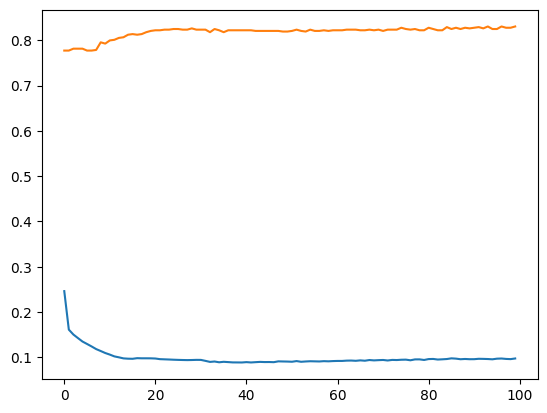

In [114]:
from ClassModules import *
import save_model as sm

from pandas import DataFrame

data = np.genfromtxt("train.csv", delimiter=",")
dataset = []

raw_pyhton_dataset = []

# Pclass, Sex, Age, Fare, Survived
for row in data[1:]:
    raw_pyhton_dataset.append([row[2]/3, row[4], row[5] / 50, row[9] / 100, int(row[1])])


raw_dataset = DataFrame(raw_pyhton_dataset)
res = raw_dataset.dropna(axis=0)
res = res.to_numpy()

for i in range(714):
    row = res[i]
    data = [0., 0.]
    data[int(row[4])] = 1.0
    # data = 0.0
    # if int(row[4]):
    #     data = 1.0
    out = np.array(data)
    dataset_row = [np.array([[row[0], row[1], row[2], row[3]]]),  np.array(out)]
    
    dataset.append( dataset_row )
    # print([np.array([row[0], row[1], row[2], row[3]]), np.array([row[3]]) ] )
# print(raw_dataset)

# for i in res[:10]:
#     print(res[i])
    
print(len(dataset))
# for i in range(30):
#     print(m.predict(dataset[i][0]), dataset[i][1])

print(model.calc_accuracy(dataset))

# восстановить
import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.plot(accuracy_arr)
plt.show()

In [ ]:
from keras.models import model_from_json
import h5py
with h5py.File("new_model.h5", "r") as hf:
    # Загружаем архитектуру
    model_architecture = hf.attrs["model_architecture"]
    loaded_model = model_from_json(model_architecture)

    # Загружаем веса
    for layer in loaded_model.layers:
        # print(layer, '\n')
        for weight in layer.weights:
            weight_value = hf[layer.name][weight.name.split('/')[1]][...]
            weight.assign(weight_value)